<h1><center> Tutorial di Twitch </center></h1>


### Gaia Cigna X81000886
## Cos'è Twitch?

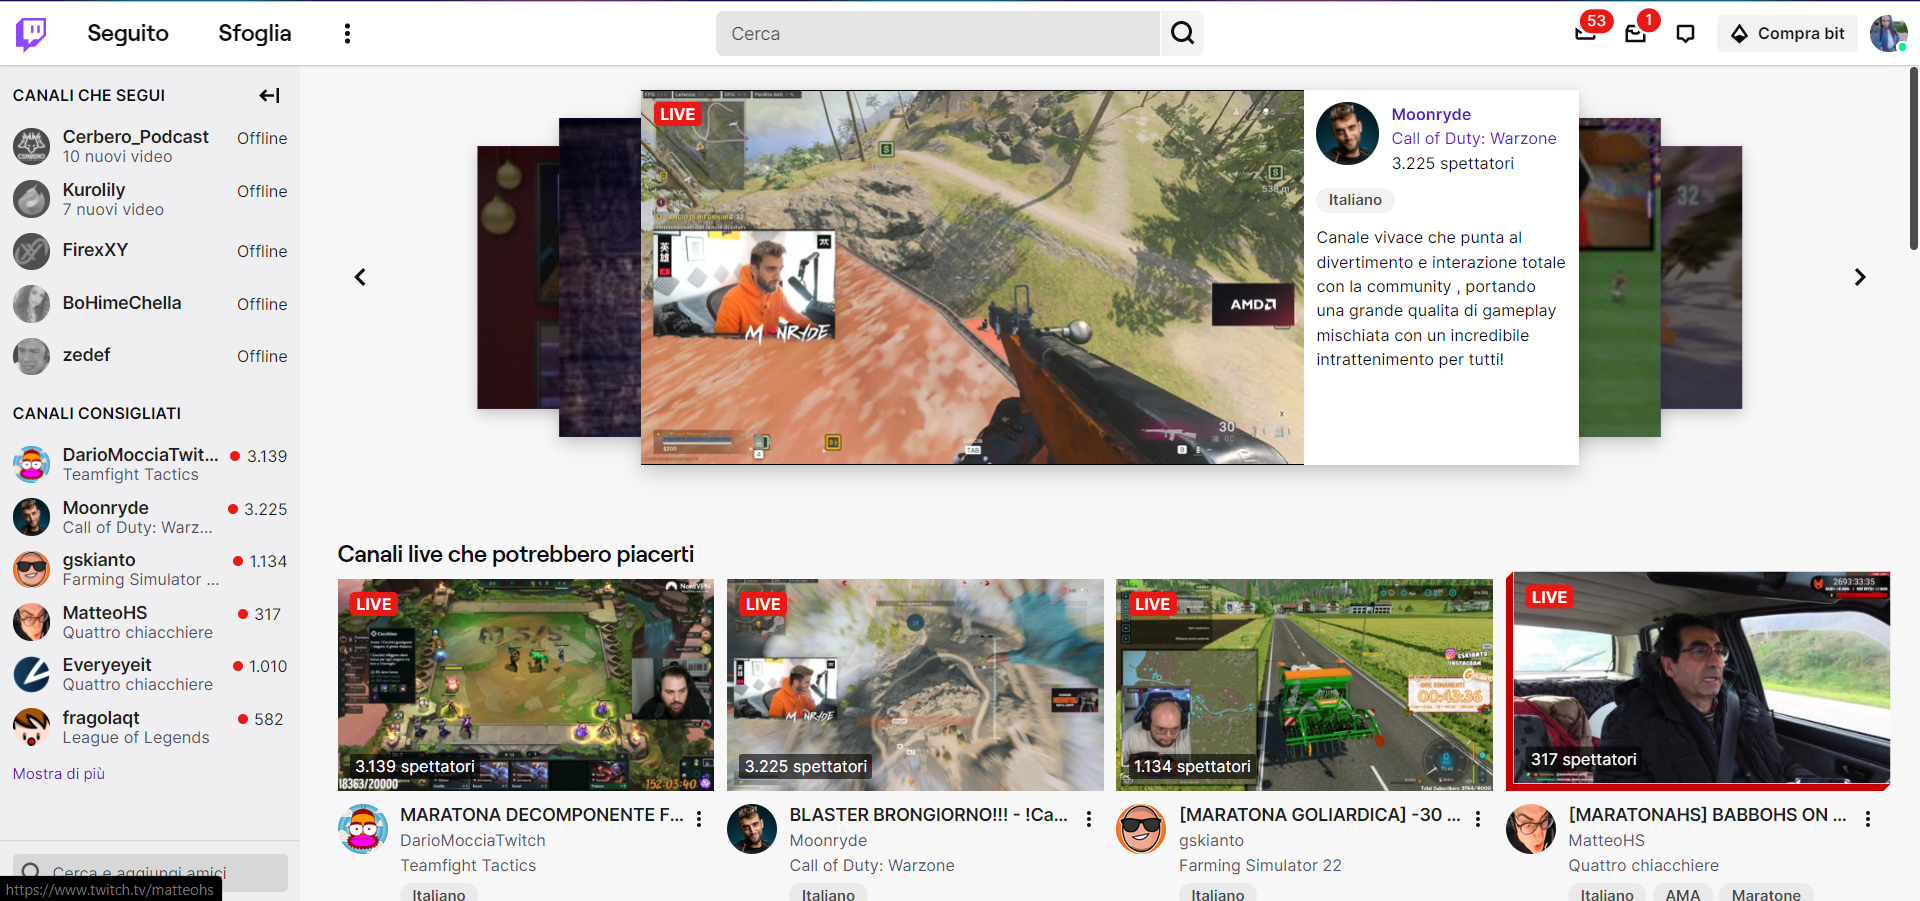

### Twitch è una piattaforma di livestreaming creata nel 2011 e acquistata da Amazon nel 2014. E' qui che molti streamer, soprattutto appassionati di gaming, coinvolgono i loro fan principalmente attraverso la livechat. Ovviamente il gaming non è l'unica temcatica portata dagli utenti, ma troviamo anche podcast, streaming a tema sportivo e tanto altro ancora.

## Creare o accedere ad un account Twitch developer

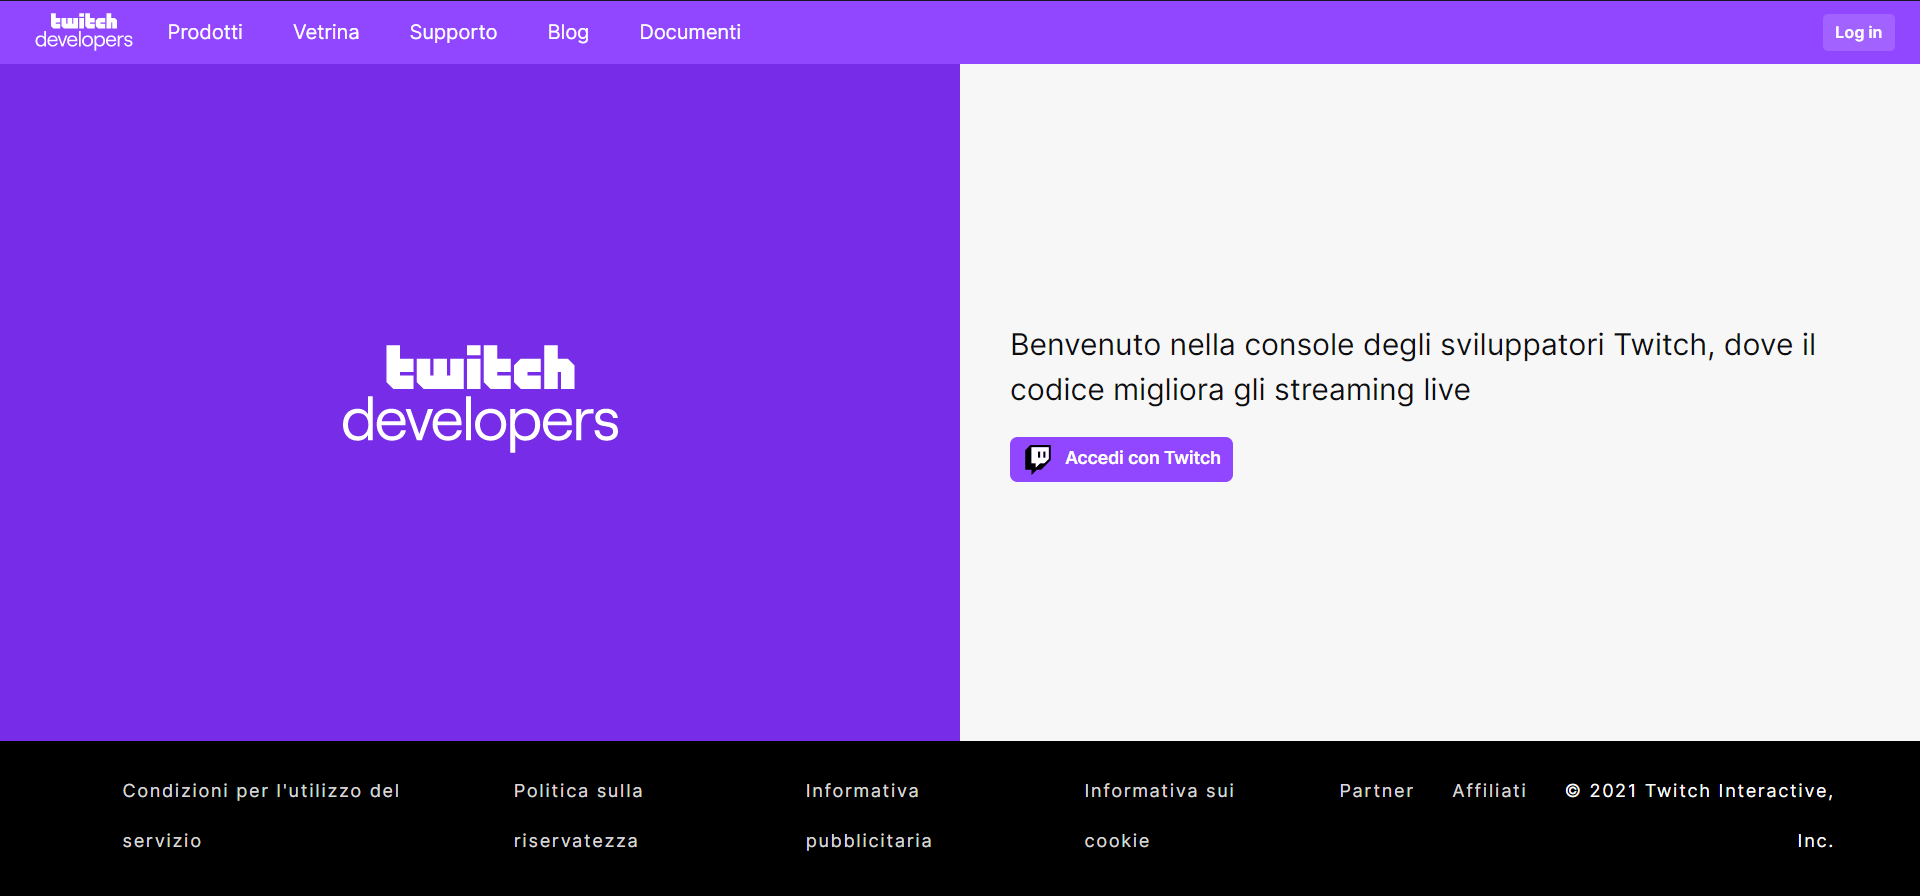

### Per utilizzare le API di Twitch bisogna, anzitutto, creare un account di Twitch per sviluppatori, se non lo si possiede già. Per creare un account sono richiesti la scelta di un username, l'inserimento dell'indirizzo email personale e la data di nascita. Inoltre, bisogna definire una buona password. Se, invece, già si possiede un account, basta fare il log in:

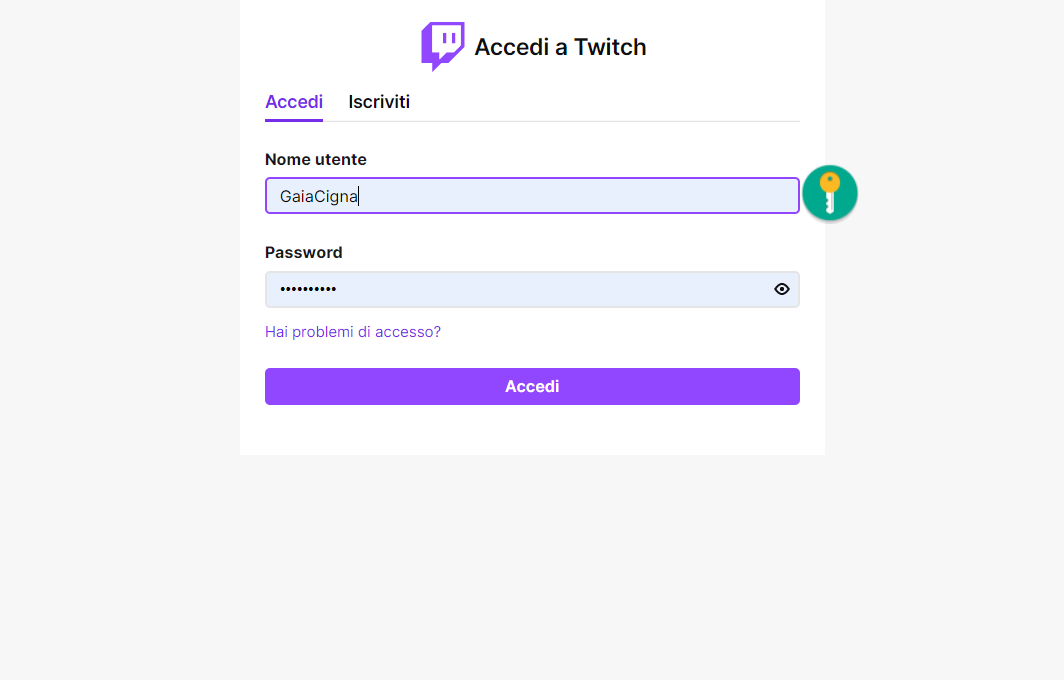

### E' importante autorizzare l'accordo di servizio per sviluppatori di Twitch:

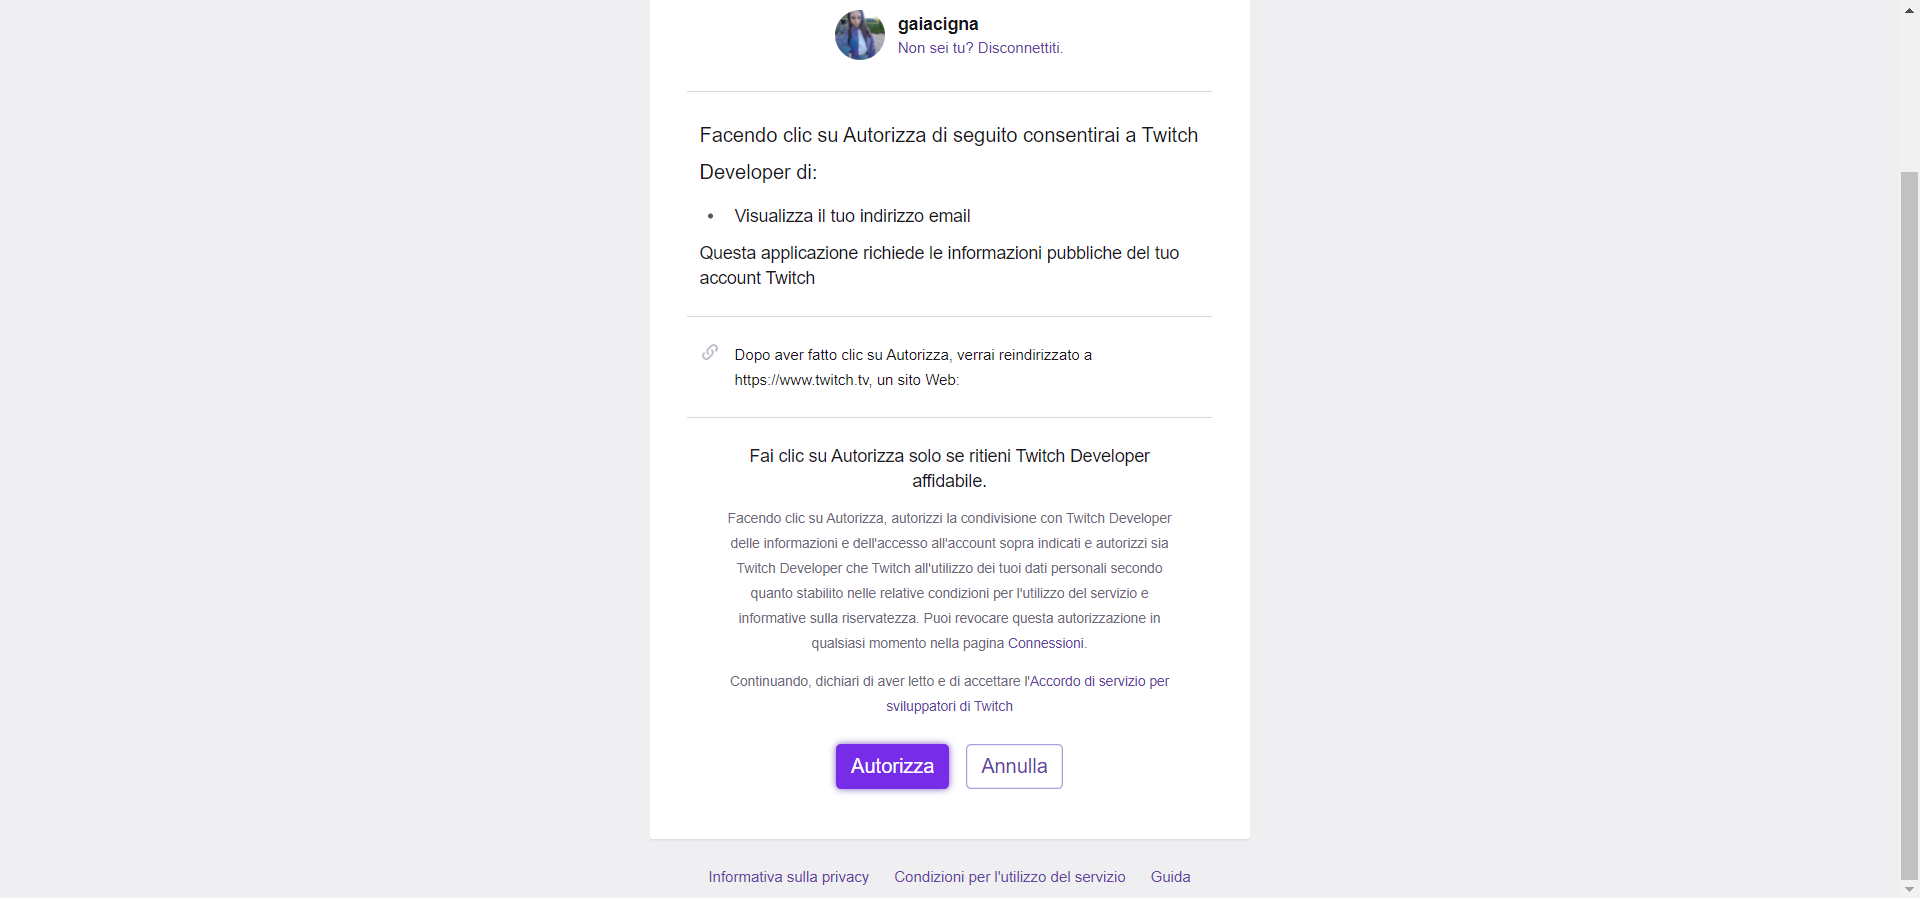

### Una volta effettuato l'accesso, bisogna impostare l'autenticazione a due fattori:

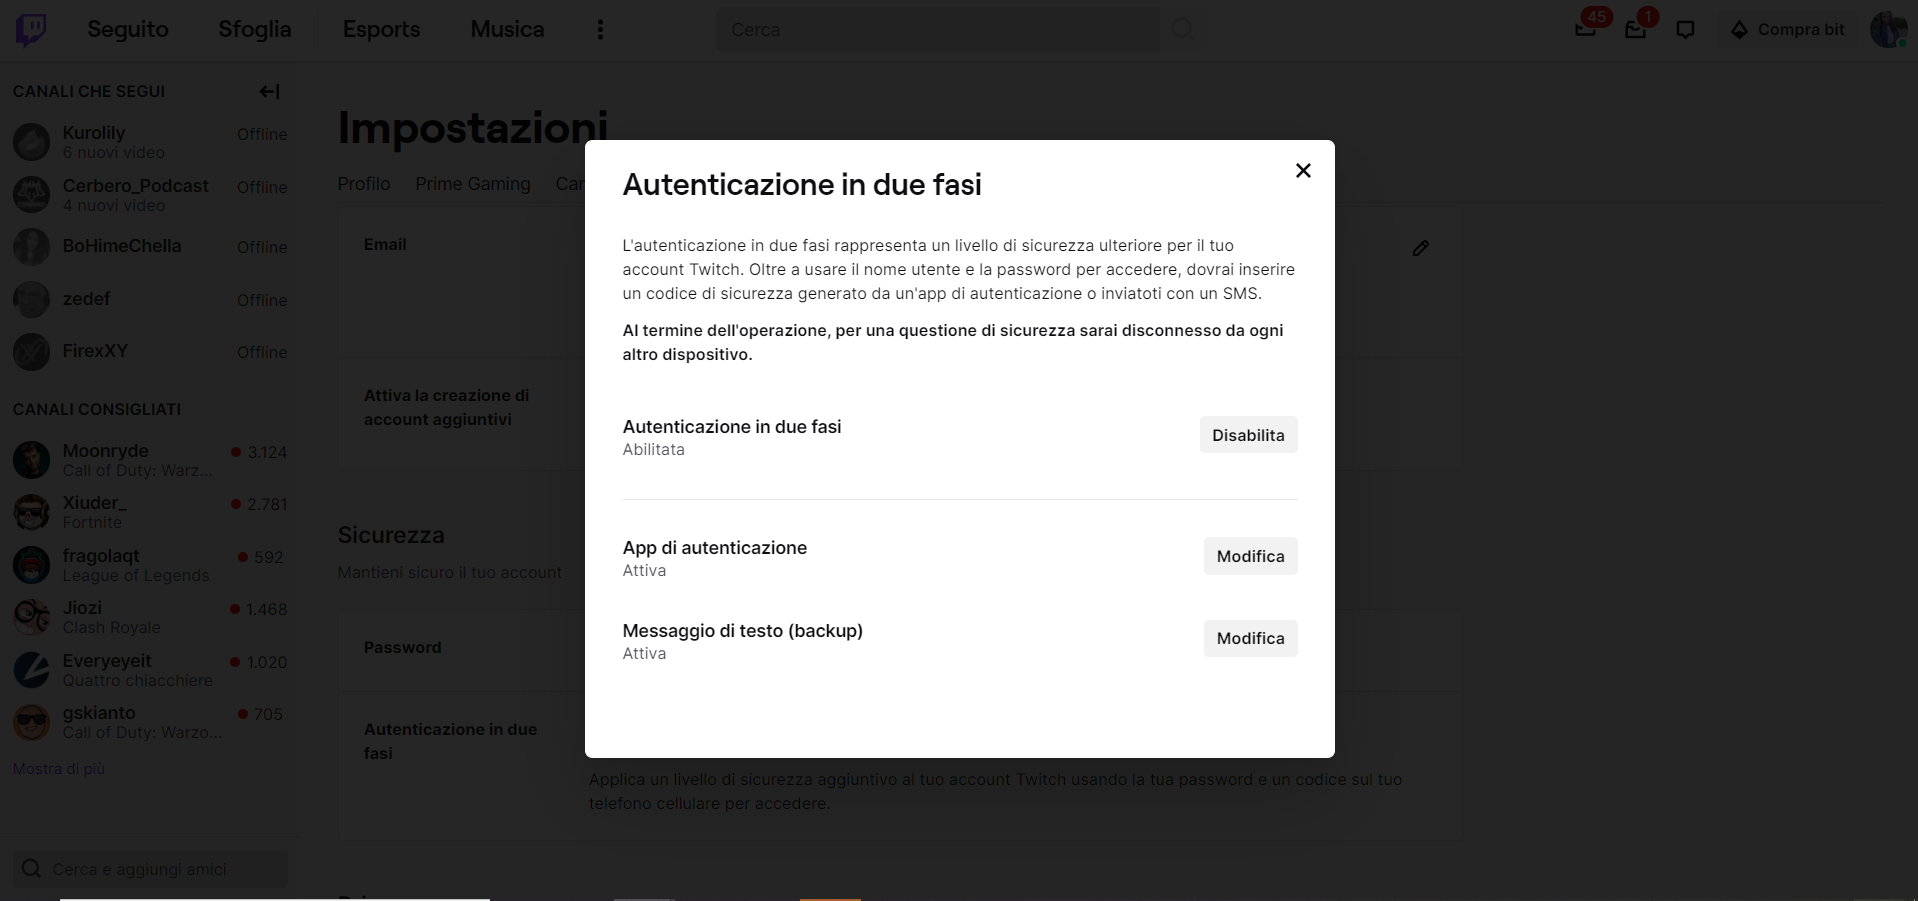

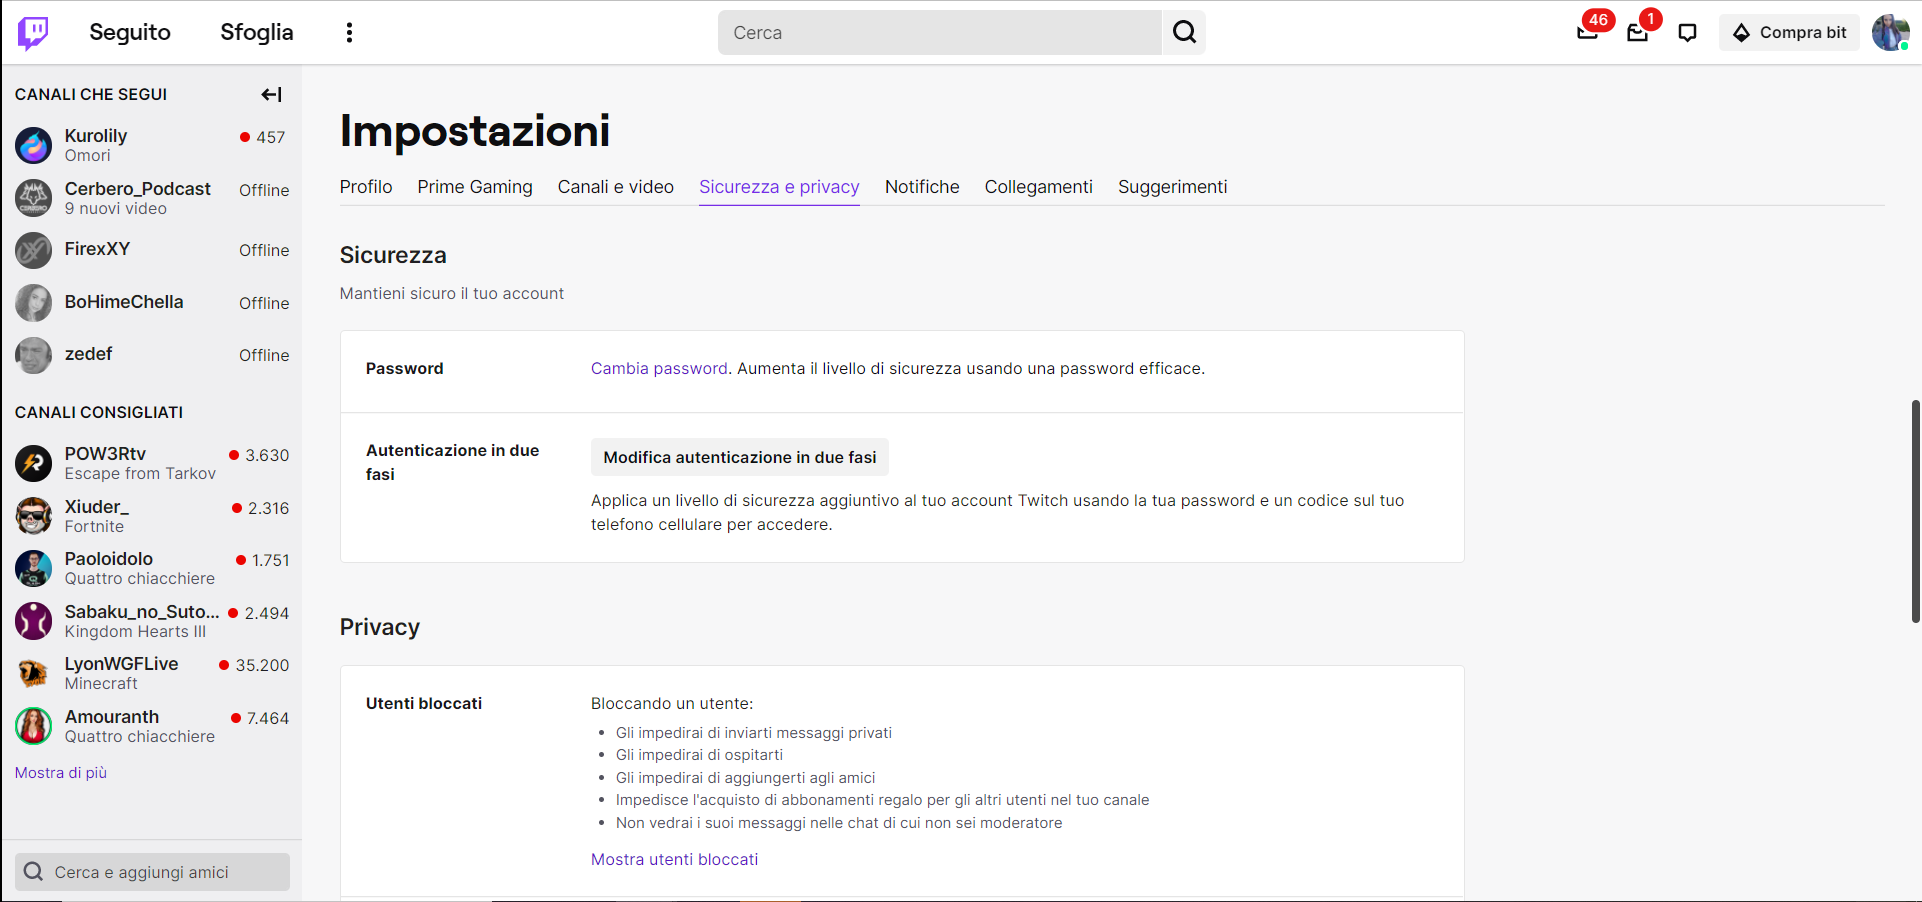

### Una volta fatto, possiamo creare un'applicazione dalla nostra console. Qui dobbiamo cliccare su "registra l'applicazione".

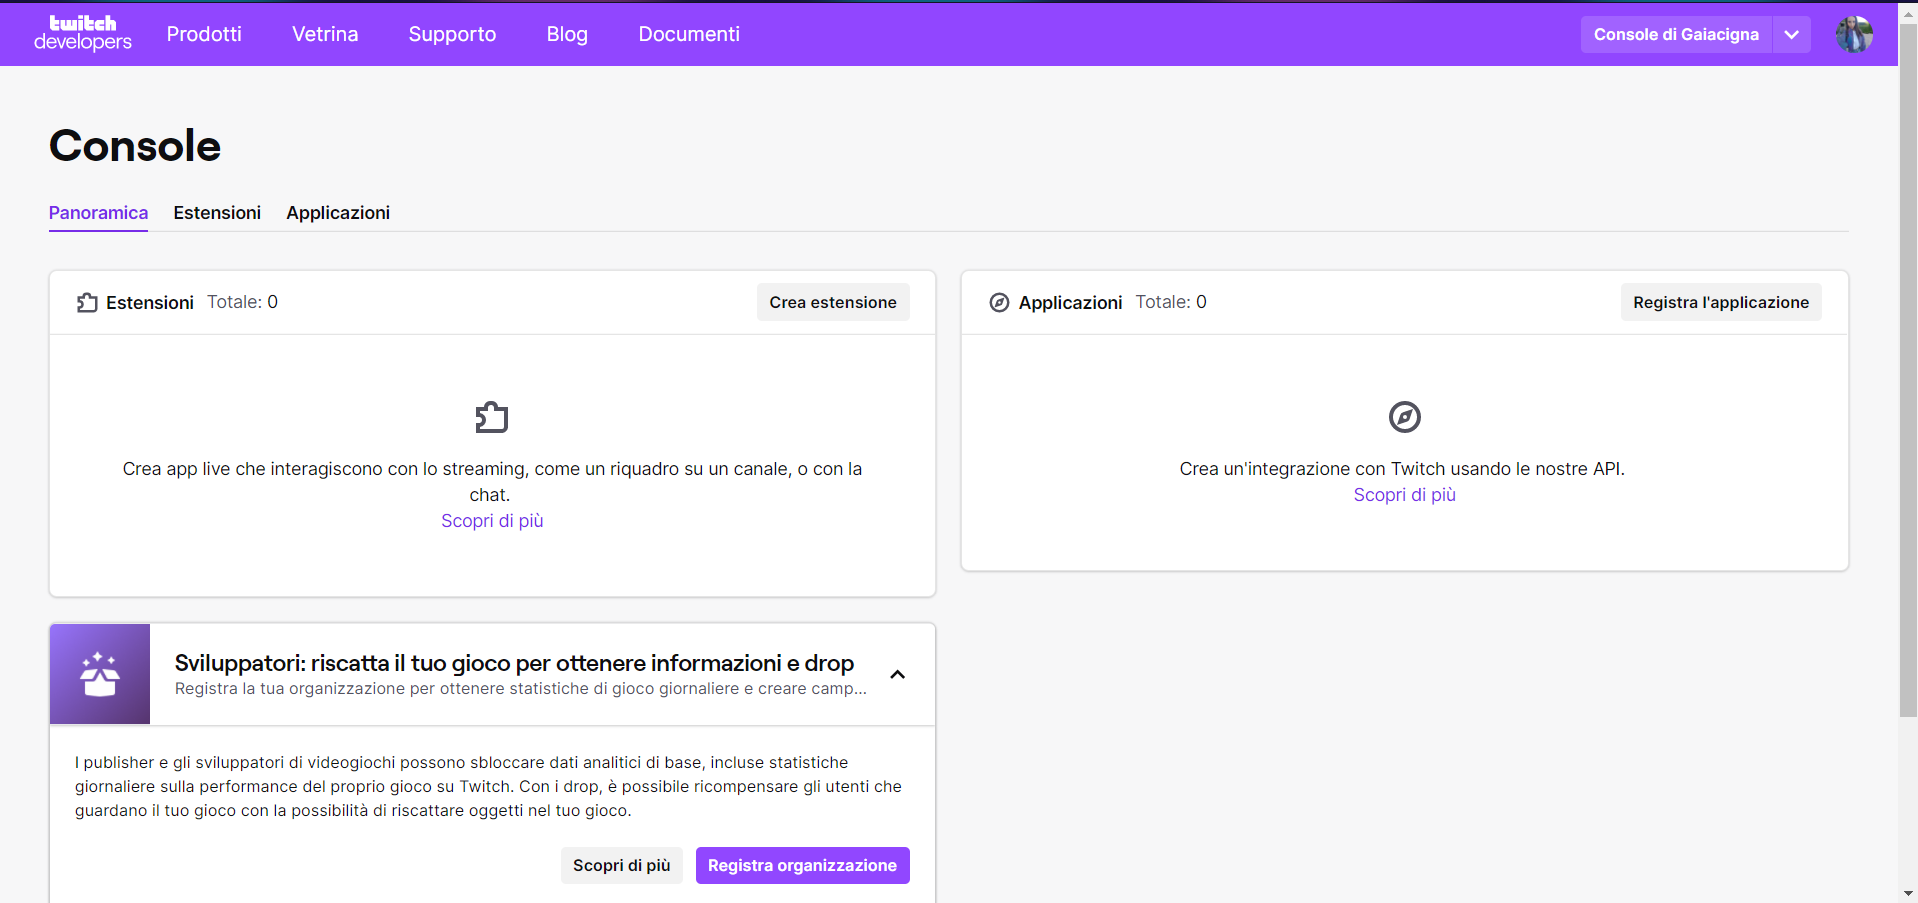

#### A questo punto, come si nota nella prossima immagine, bisogna:
#### 1. Definire un nome per l'applicazione
#### 2. Settare almeno un OAuth Redirect URL (in tal caso va bene settare il local host)
#### 3. Scegliere una categoria
#### 4. Cliccare su "non sono un robot"
#### 5. Infine, cliccare su "crea"

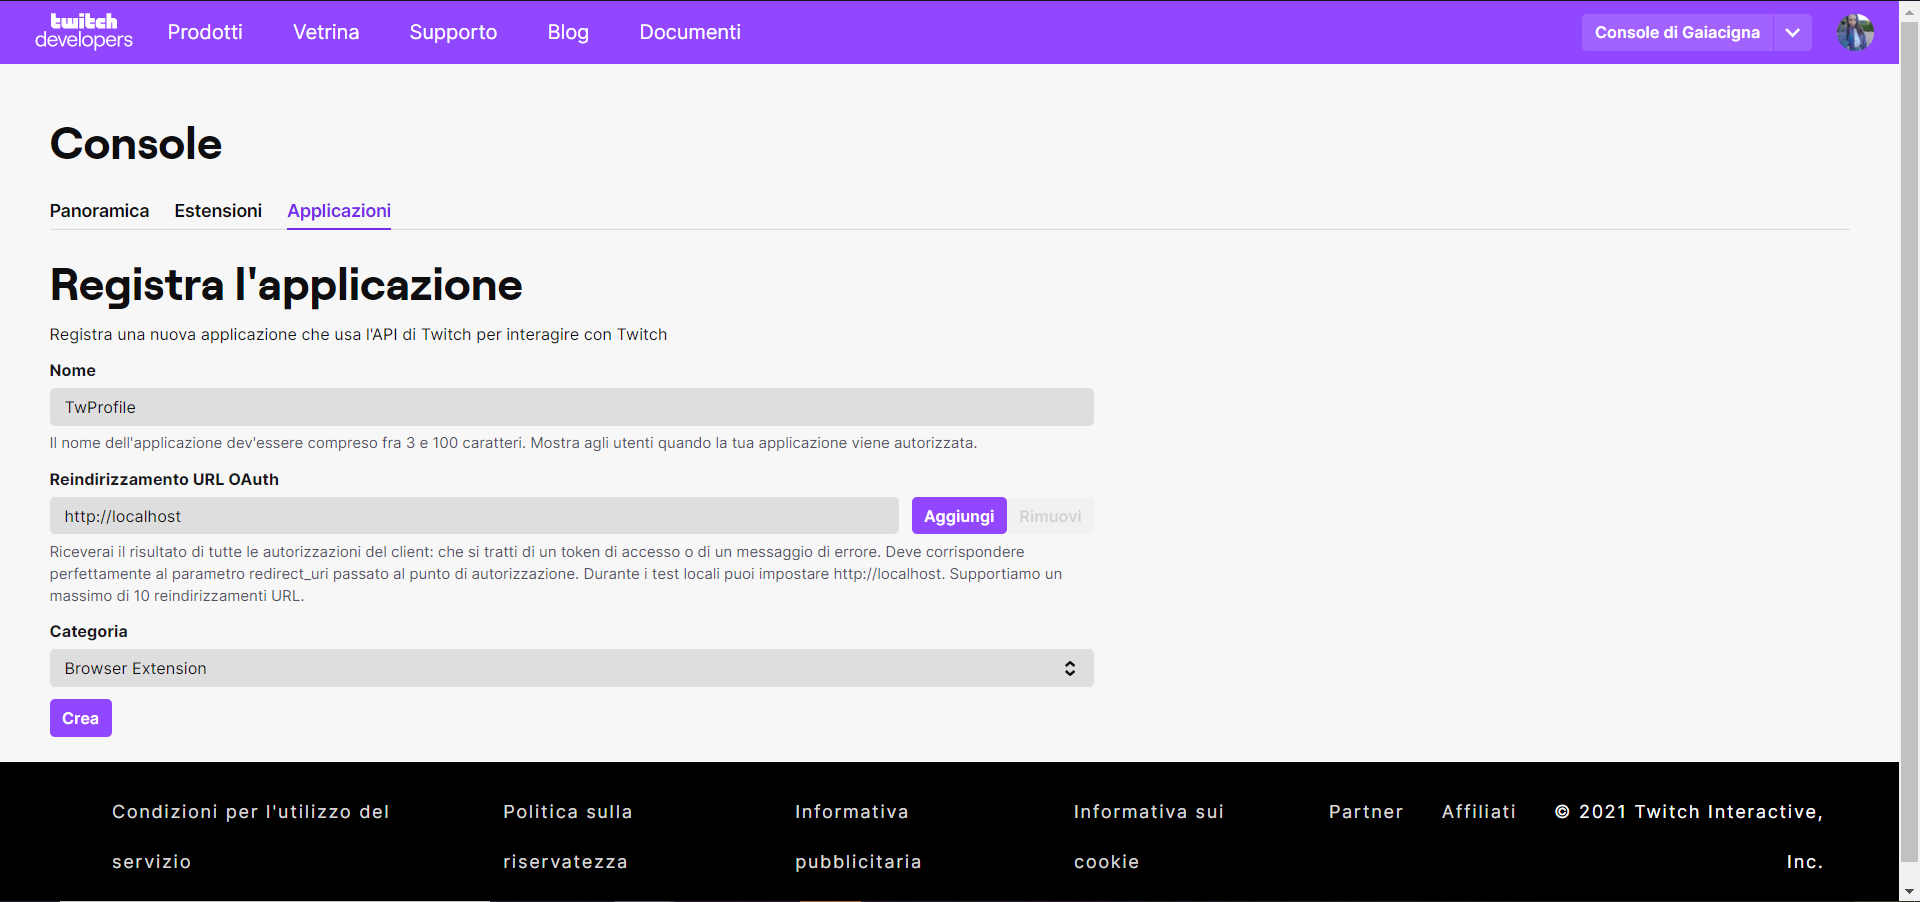

### Una volta fatto ciò, nella nostra console, alla scheda "applicazioni", spunterà proprio l'applicazione che abbiamo appena creato. Quindi, non ci resta che cliccare su "gestisci".

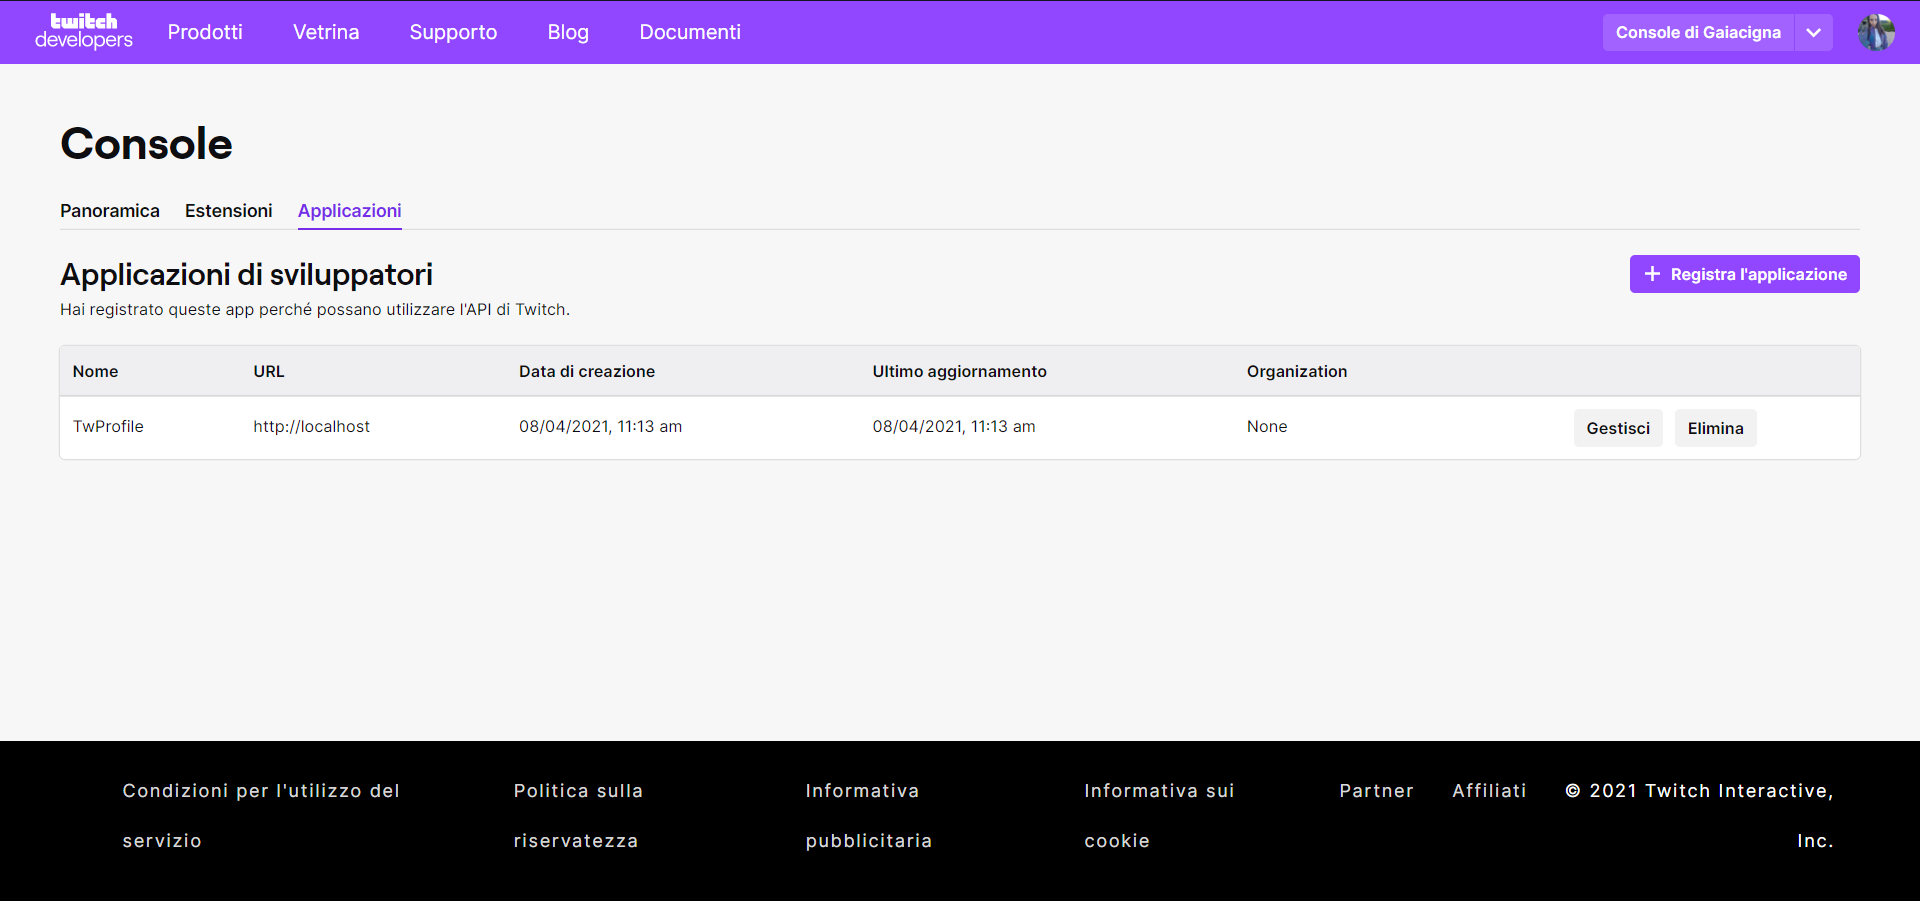

### Adesso possiamo leggere in basso il Client ID:

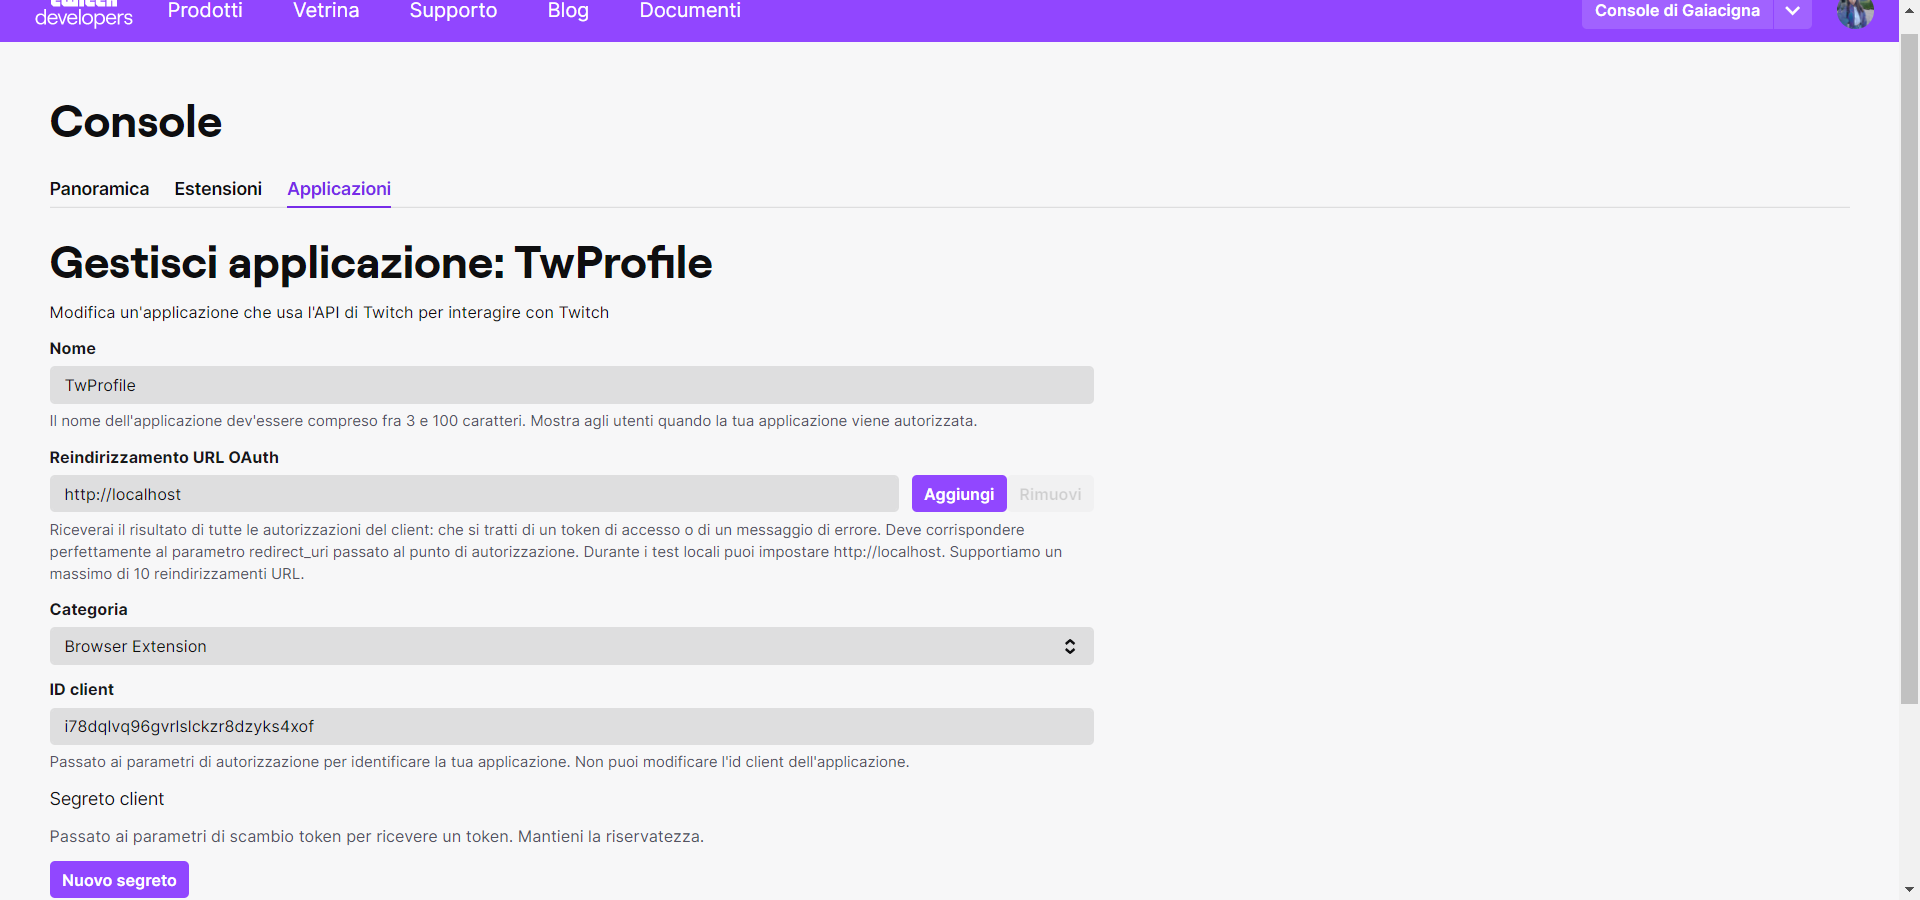

### Cliccando su "nuovo segreto", otterremo il Client Secret, ottenendo così tutti i requisiti necessari ai fini dell'autenticazione nelle chiamate dell'API.

## Come ottenere un Access Token

In [76]:
import requests

client_id = 'mzhm761tpuj2we0ordfuh37expwe2w'
client_secret = '0a0yc8e9nevlt8k7jsoyp4tmbyyorz'

body = {
    'client_id': client_id,
    'client_secret': client_secret,
    "grant_type": 'client_credentials'
}
r = requests.post('https://id.twitch.tv/oauth2/token', body)

#data output
keys = r.json();

headers = {
    'Client-ID': client_id,
    'Authorization': 'Bearer ' + keys['access_token']
}

#print(keys)
print("Access token is:",keys["access_token"])

Access token is: 87trqbweduixowokgw4bwjhxf9ur3u


## Esempi di utilizzo dell'API ufficiali

### Dal codice seguente, otteniamo informazioni su uno streamer, in particolare scopriamo se è attualmente in live e a che gioco sta giocando. Possiamo notare che se il json ha lunghezza 1, allora significherà che lo streamer è offline.

In [15]:
streamer_name = 'Kurolily'
stream = requests.get('https://api.twitch.tv/helix/streams?user_login=' + streamer_name, headers=headers)

stream_data = stream.json();
print(stream_data);

if len(stream_data['data']) == 1:
    print(streamer_name,"is live");
    print(streamer_name,"is playing",stream_data['data'][0]['game_name'])
else:
    print(streamer_name + ' is not live')

{'data': [{'id': '44349505484', 'user_id': '43030068', 'user_login': 'kurolily', 'user_name': 'Kurolily', 'game_id': '493597', 'game_name': 'New World', 'type': 'live', 'title': 'DROP - New World é resuscitato?  !kurogear !youtube !tiktok ', 'viewer_count': 644, 'started_at': '2022-01-11T12:52:28Z', 'language': 'it', 'thumbnail_url': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kurolily-{width}x{height}.jpg', 'tag_ids': ['5b9935eb-1e9a-4217-98ad-62bda5cff0d1', 'c2542d6d-cd10-4532-919b-3d19f30a768b'], 'is_mature': False}], 'pagination': {}}
Kurolily is live
Kurolily is playing New World


### Per alcune richieste, serve l'OAuth token e, se richiesto, specificando lo scope che quel token autorizza:

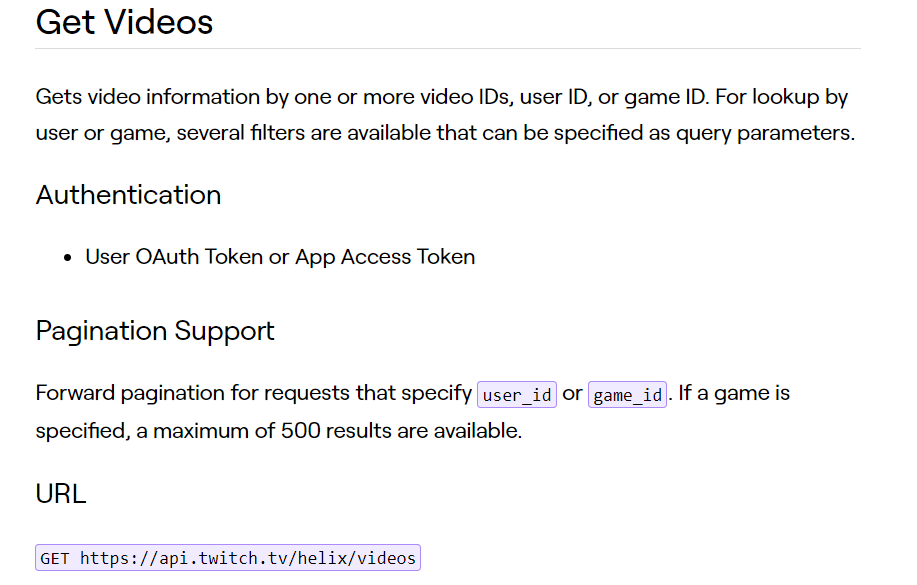

### Per ottenere l'OAuth token, bisogna utilizzare il link seguente in cui inserire il proprio Client ID e lo scope se richiesto: https://twitchapps.com/tokengen/?code=dlsxt2g4jp301cfp7ou7ohky43dglv&scope=analytics%3Aread%3Agames

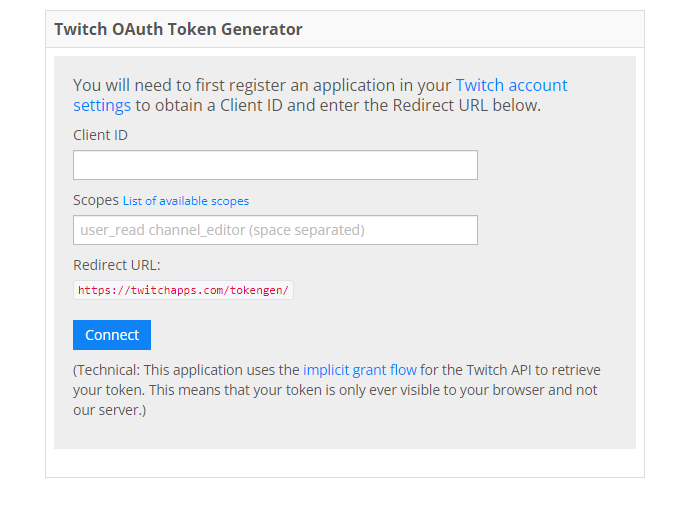

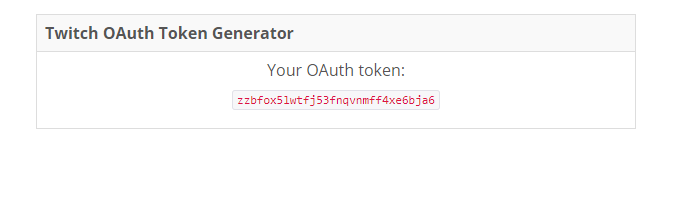
  

### Per la generazione dell'OAuth token scriviamo:

In [94]:
oauth="zzbfox5lwtfj53fnqvnmff4xe6bja6"
headers_oAuth_user={
    'Authorization': 'Bearer ' + oauth,
    'Client-ID': client_id
}

### In questo codice, invece, otteniamo l'elenco di tutte le live salvate nel profilo dello streamer indicato nel codice di prima:

In [96]:
r = requests.get('https://api.twitch.tv/helix/videos?user_id=43030068', headers = headers_oAuth_user)

for i, video in enumerate(r.json()['data']):
    print(str(i) + ' ' + video['title'])

0 Spacchettiamo Pokemon *O*  !youtube !tiktok 
1 HORROR Friday  !youtube !tiktok 
2 [AR58] Nuova patch 2.4, quest e building Shenhe !youtube !tiktok 
3 [AR58] Nuova patch 2.4, pulliamo Shenhe !mediaworld !airaction 
4 Domani mega patch su Genshin !mediaworld !airaction 
5 Torna la RPG NIGHT - Librogame  !mediaworld !airaction 
6 Si riparte con il nuovo anno, buon 2022 !mediaworld !airaction 
7 Buona Vigilia a tutti ^Ô^ !mediaworld !airaction 
8 Apriamo i regali non arrivati a Natale !mediaworld !airaction 
9 [AR58] Nuova ricompensa !primegaming !airaction #ad
10 E' arrivata mia sorella Glory *O*  !airaction
11 [AR58] Commentiamo insieme la nuova patch !airaction
12 Buona Vigilia ^O^  !mediaworld !airaction #ad
13 Domani apriamo i regali! !mediaworld !airaction #ad
14 [AR58] Evento e abyss !mediaworld !logitechG !airaction #ad
15 Quante cose belle !mediaworld !logitechG !airaction #ad
16 [AR58] Farmino del Lunedí !mediaworld !logitechG !airaction #ad
17 MODS DAY  !mediaworld !logitechG 


## Esempi di utilizzo di API di terze parti

In [17]:
from twitchAPI.twitch import Twitch
from pprint import pprint
twitch = Twitch(client_id, client_secret)
pprint(twitch.get_users(logins=[streamer_name]))

{'data': [{'broadcaster_type': 'partner',
           'created_at': '2013-04-29T22:14:25Z',
           'description': 'Dai survival agli mmorpg, senza farci mancare '
                          'sparatutto, horror e avventure grafiche. Se ami il '
                          'gioco di ruolo sei nel posto giusto.Per contatti '
                          'commerciali: kurolily@arkadia.agency  ',
           'display_name': 'Kurolily',
           'id': '43030068',
           'login': 'kurolily',
           'offline_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/b5dd5f68-6587-4125-83c4-e30f5093a638-channel_offline_image-1920x1080.png',
           'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/c088aa59-4cac-481b-bfb7-eb5c89798a28-profile_image-300x300.png',
           'type': '',
           'view_count': 15729671}]}


## Esempi di estrazione dati

### Adesso vediamo una serie di esempi di estrazione dei dati, con l'aiuto delle reference di Twitch. In particolare in questo codice vediamo come si ottiene la lista dei 50 giochi più giocati nelle live. In realtà, quelle che qui chiamiamo "giochi", sono in particolare le categorie di Twitch, ovvero tutte le categorie possibili in cui una live può essere classificata. E' per questo motivo che, nell'elenco che ci ritorna, troviamo anche "just chatting", "music" o "art".

In [77]:
ngiochi = '50'

stream = requests.get('https://api.twitch.tv/helix/games/top?first=' + ngiochi, headers = headers)

topgames_data = stream.json()

print(topgames_data)

{'data': [{'id': '21779', 'name': 'League of Legends', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/21779-{width}x{height}.jpg'}, {'id': '509658', 'name': 'Just Chatting', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/509658-{width}x{height}.jpg'}, {'id': '32982', 'name': 'Grand Theft Auto V', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/32982_IGDB-{width}x{height}.jpg'}, {'id': '1869092879', 'name': 'FIFA 22', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/1869092879_IGDB-{width}x{height}.jpg'}, {'id': '263490', 'name': 'Rust', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/263490_IGDB-{width}x{height}.jpg'}, {'id': '516575', 'name': 'VALORANT', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/516575-{width}x{height}.jpg'}, {'id': '33214', 'name': 'Fortnite', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/33214-{width}x{height}.jpg'}, {'id': '27471', 'name': 'Minecraft', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-

### A questo punto, creiamo due liste che ordinano l'output ottenuto dal codice precedente, in modo tale da raccogliere nella prima lista (idgame) tutti gli id dei giochi e nella seconda lista (gamename) tutti i nomi dei giochi.

In [78]:
idgame = []
gamename = []

for game in topgames_data["data"]:
    idgame.append(game['id'])
    gamename.append(game['name'])

print(idgame, gamename)

['21779', '509658', '32982', '1869092879', '263490', '516575', '33214', '27471', '30921', '511224', '29595', '32399', '491931', '512710', '495764', '6369', '491487', '518203', '1068239917', '498566', '18122', '491168', '513143', '26936', '138585', '1664077267', '1275666892', '493057', '490100', '27546', '490384', '488190', '513181', '510218', '506416', '24241', '509660', '752590871', '518184', '491080', '509659', '493959', '19620578', '386821', '495961', '490292', '743', '31339', '499634', '460630'] ['League of Legends', 'Just Chatting', 'Grand Theft Auto V', 'FIFA 22', 'Rust', 'VALORANT', 'Fortnite', 'Minecraft', 'Rocket League', 'Apex Legends', 'Dota 2', 'Counter-Strike: Global Offensive', 'Escape from Tarkov', 'Call of Duty: Warzone', 'Golf It!', 'God of War', 'Dead by Daylight', 'Sports', 'Mario Party Superstars', 'Slots', 'World of Warcraft', 'Clash Royale', 'Teamfight Tactics', 'Music', 'Hearthstone', 'New Home: Medieval Village', 'Monster Hunter Rise', 'PUBG: BATTLEGROUNDS', 'LO

### Ora vogliamo sapere quanti utenti seguono le live per ciascuno di questi 50 giochi. Creiamo la lista "data" che è una lista di liste di dizionari che contengono le top 50 streams per ogni gioco.

In [98]:
data = [] 
viewcount = 0

for i in range(len(idgame)):
    streams = requests.get('https://api.twitch.tv/helix/streams?game_id=' + idgame[i] + '&first=50', headers = headers)
    streams_data = streams.json()['data']
    data.append(streams_data)
    for stream in streams_data:
        viewcount += stream['viewer_count']
    print("game: " + streams_data[0]['game_name'] + ' - connected users: ' + str(viewcount))
    viewcount = 0

game: League of Legends - connected users: 516269
game: Just Chatting - connected users: 339924
game: Grand Theft Auto V - connected users: 220195
game: FIFA 22 - connected users: 204083
game: Rust - connected users: 158412
game: VALORANT - connected users: 84658
game: Fortnite - connected users: 107337
game: Minecraft - connected users: 46121
game: Rocket League - connected users: 105167
game: Apex Legends - connected users: 78697
game: Dota 2 - connected users: 56681
game: Counter-Strike: Global Offensive - connected users: 73013
game: Escape from Tarkov - connected users: 55732
game: Call of Duty: Warzone - connected users: 49080
game: Golf It! - connected users: 130
game: God of War - connected users: 56968
game: Dead by Daylight - connected users: 25877
game: Sports - connected users: 36879
game: Mario Party Superstars - connected users: 42975
game: Slots - connected users: 32908
game: World of Warcraft - connected users: 21946
game: Clash Royale - connected users: 28443
game: Tea

### Con le informazioni ottenute possiamo costruire un dataframe, grazie alla libreria "pandas". Questo dataframe sarà riempito con tutti i dati sulle 50 streams attualmente più seguite. Il dataframe conterrà informazioni sulla lingua, sul numero di visualizzazioni attuale, sull'orario di inizio, se è un contenuto per adulti, eccetera...

In [101]:
import pandas as pd

organized_list = []

for j in data: 
    single_game_dataframe = pd.DataFrame.from_dict(j)
    organized_list.append(single_game_dataframe)
    
dataframe = pd.concat(organized_list)
dataframe

,id,user_id,user_login,user_name,game_id,game_name,type,title,viewer_count,started_at,language,thumbnail_url,tag_ids,is_mature
0,44402298380,124422593,lec,LEC,21779,League of Legends,live,2022 Spring LEC - Week 1 Day 3,201974,2022-01-16T14:14:50Z,en,https://static-cdn.jtvnw.net/previews-ttv/live...,"[36a89a80-4fcd-4b74-b3d2-2c6fd9b30c95, 6ea6bca...",False
1,44402754300,622498423,otplol_,otplol_,21779,League of Legends,live,LEC SPRING 2022 - G2 vs MAD - W1D3,96621,2022-01-16T15:02:24Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,[6f655045-9989-4ef7-8f85-1edcec42d648],False
2,40438065707,22346597,lvpes,LVPes,21779,League of Legends,live,LEC JORNADA 3 - SPRING SPLIT 2022 - LEAGUE OF ...,54323,2022-01-16T15:17:59Z,es,https://static-cdn.jtvnw.net/previews-ttv/live...,"[d4bb9c58-2141-4881-bcdc-3fe0505457d1, 36a89a8...",False
3,45170550989,40336240,summonersinnlive,SummonersInnLive,21779,League of Legends,live,LEC Spring Season 2022 | Woche 1 Tag 3,18001,2022-01-16T15:00:07Z,de,https://static-cdn.jtvnw.net/previews-ttv/live...,"[36a89a80-4fcd-4b74-b3d2-2c6fd9b30c95, 9166ad1...",False
4,40437452523,85397463,noway4u_sir,NoWay4u_Sir,21779,League of Legends,live,Clash mit der Elite !stand !wette,15326,2022-01-16T11:35:32Z,de,https://static-cdn.jtvnw.net/previews-ttv/live...,[9166ad14-41f1-4b04-a3b8-c8eb838c6be6],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,45169730621,145028858,ultrahtv,UltrahTV,460630,Tom Clancy's Rainbow Six Siege,live,RANKED GO4 LATER OR SOM | @UltrahTV on Socials,22,2022-01-16T13:15:45Z,en,https://static-cdn.jtvnw.net/previews-ttv/live...,"[e1a43486-eee5-4f36-9ee6-76e72af00180, 353ab6a...",False
46,45171329389,136983752,vikoca,Vikoca,460630,Tom Clancy's Rainbow Six Siege,live,"R6S | Sohasem mi, hanem a körülöttünk lévő emb...",21,2022-01-16T16:27:24Z,hu,https://static-cdn.jtvnw.net/previews-ttv/live...,[a298cca5-d408-47c7-a1e7-0c76ca878bc6],True
47,44404472556,407943591,lilalux_1,LilaLux_1,460630,Tom Clancy's Rainbow Six Siege,live,L'improvisation reste un mot que j'affectionne...,19,2022-01-16T17:34:09Z,fr,https://static-cdn.jtvnw.net/previews-ttv/live...,"[6f655045-9989-4ef7-8f85-1edcec42d648, be60ae5...",True
48,44405744396,94654994,lahdabeballin,Lahdabeballin,460630,Tom Clancy's Rainbow Six Siege,live,Birthday Stream| Shots 4 Subs <3 {Delay Active...,18,2022-01-16T19:15:06Z,en,https://static-cdn.jtvnw.net/previews-ttv/live...,"[6ea6bca4-4712-4ab9-a906-e3336a9d8039, 69318d0...",True


## Analisi dei dati

### Una volta creato il dataframe, possiamo costruire dei grafici per analizzare i dati. Ad esempio, in questo caso vogliamo scoprire quale sia la lingua più popolare su Twitch:

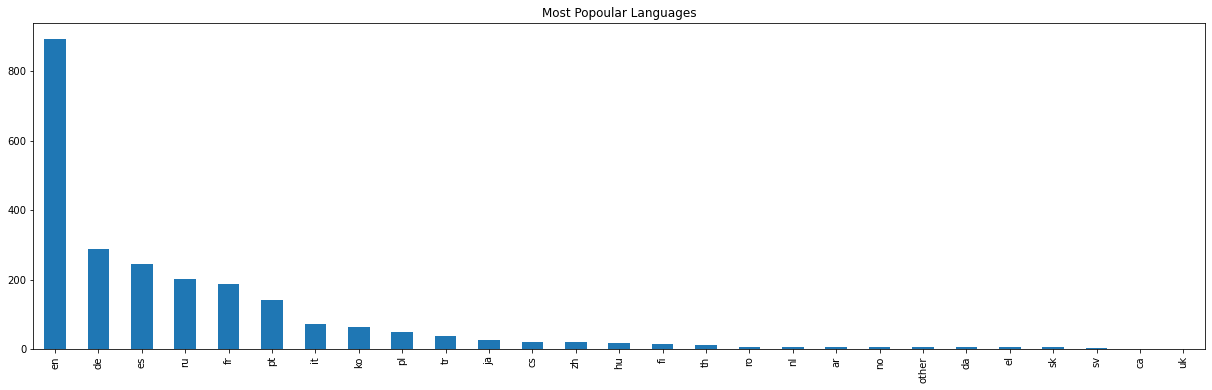

In [102]:
%matplotlib inline

dataframe['language'].value_counts().plot.bar(figsize=(21,6), title = 'Most Popoular Languages')

### Nel caso appena visto, abbiamo usato un grafico a blocchi, ma possiamo fare lo stesso con un grafico a torta. In entrambi i casi, è evidente che la lingua più parlata nelle streams è l'inglese. All'appello manca sicuramente il cinese (che ci aspettiamo abbia numeri superiori o alla pari dell'inglese) poichè Twitch non è una piattaforma disponibile in Cina.

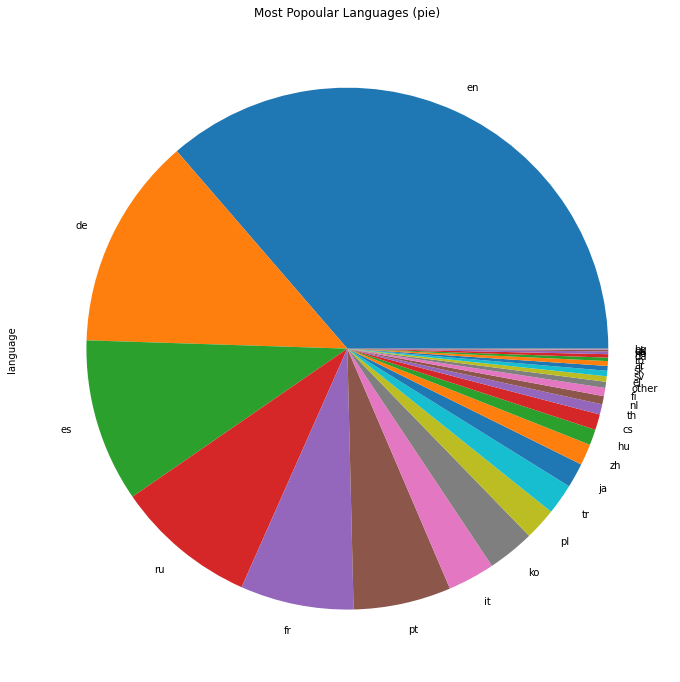

In [82]:
dataframe['language'].value_counts().plot.pie(figsize=(12,12), title="Most Popoular Languages (pie)")

### Adesso, vogliamo raggruppare tutti i giochi in base al numero di views totali per ciascuno di essi, utilizzando un grafico a blocchi. Vediamo svettare subito League Of Legends, poi Rust e, al terzo posto, Valorant:

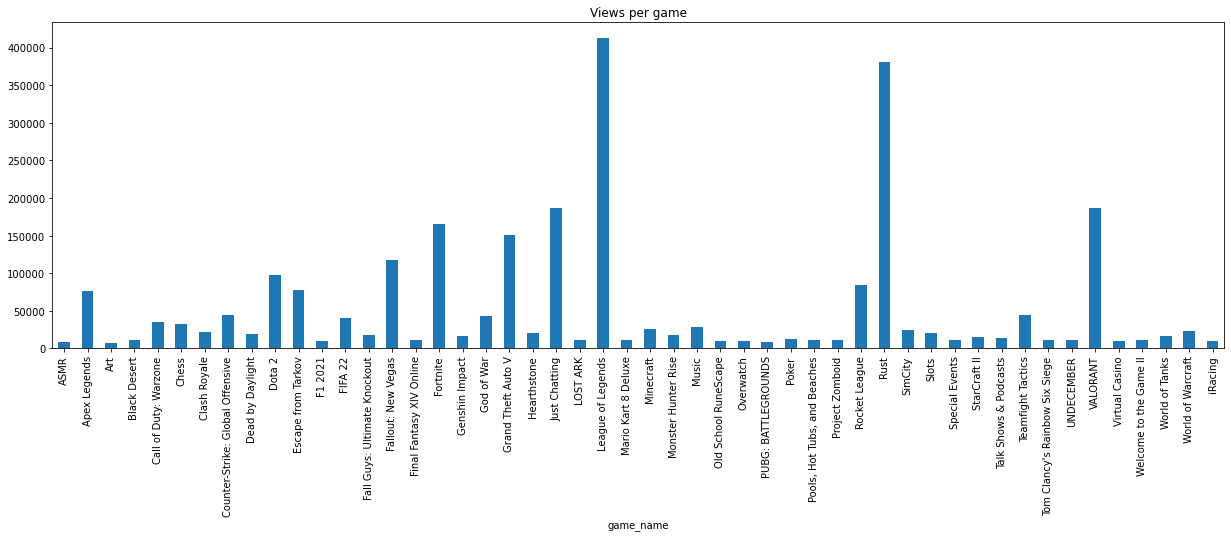

In [23]:
dataframe.groupby('game_name')['viewer_count'].sum().plot.bar(figsize=(21,6), title="Views per game")

### Con il grafico a torta che vediamo qui di seguito, scopriamo il numero di live con contenuti espliciti rispetto al numero di live senza limiti d'età:

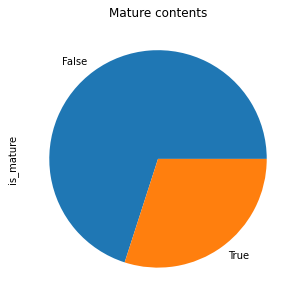

In [75]:
dataframe['is_mature'].value_counts().plot.pie(figsize=(5,5), title="Mature contents")

### Qui di seguito, otteniamo il grafico a blocchi di tutti i giochi giocati nelle streams in lingua italiana in base al numero di spettatori. Come possiamo vedere, in questo momento, il gioco più "streammato" nelle live in lingua italiana è sicuramente Fortnite. A seguire, vediamo subito FIFA 22 e League Of Legends:

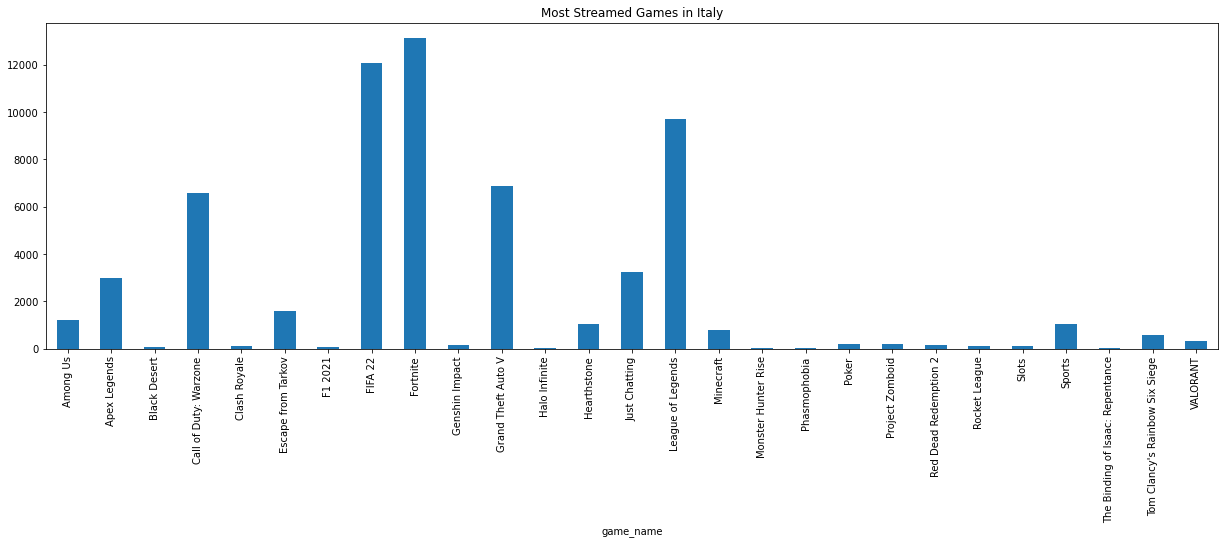

In [117]:
dataframe_it = dataframe[dataframe['language'] == 'it']

dataframe_it.groupby('game_name')['viewer_count'].sum().plot.bar(figsize = (21,6), title = "Most Streamed Games in Italy")

## Conclusioni

### In conclusione, abbiamo affrontato diversi aspetti tramite le API di Twitch, come la diffusione di una lingua online, i giochi più "streammati" in Italia, il numero di live con contenuti espliciti... In questo modo, abbiamo visto un chiaro esempio di come si possano utilizzare le API di questa piattaforma. 